In [1]:
# This code below is to se the structure of the code for Pyramidal Neuron - Larkum style
# Learning through target spikes

import numpy as np

from lttb import LTTB

import matplotlib.pyplot as plt

from tqdm import trange
import random


N, I, O, T = 500, 5, 3, 1000
shape = (N, I, O, T)

dt = .001
tau_m = 20. * dt
tau_s = 2. * dt
tau_ro = 10. * dt
tau_star = 20. * dt
tau_W = 200 * dt

beta = np.exp(-dt/tau_s)
beta_ro = np.exp(-dt/tau_ro)
beta_targ = np.exp(-dt/tau_star)
beta_W = np.exp(-dt/tau_W)

sigma_targ = 10**1.5
sigma_in = 12.

dv = 1 / 500.
alpha = .005
alpha_rout = .01
Vo = - 4
h = - 1
s_inh = 20

sigma_Jrec = 0.
sigma_wrec = 0.
sigma_Jout = 0.1
sigma_context = 0.

Ne = 400
Ni = 100

N = Ne+Ni

n_contexts = 2

# Here we build the dictionary of the simulation parameters
par = {'dt' : dt, 'tau_m' : tau_m, 'tau_s' : tau_s, 'tau_ro' : tau_ro, 'tau_star' : tau_star,'tau_W' : tau_W,
       'dv' : dv, 'Vo' : Vo, 'h' : h, 's_inh' : s_inh,
       'N' : N, 'Ni' : Ni, 'Ne' : Ne, 'T' : T, 'I' : I, 'O' : O, 'shape' : shape, 
       'sigma_Jrec' : sigma_Jrec,'sigma_wrec' : sigma_wrec, 'sigma_Jout' : sigma_Jout, 'n_contexts' : n_contexts,
       'alpha' : alpha, 'alpha_rout' : alpha_rout,'sigma_context' : sigma_context,
       'sigma_in' : sigma_in, 'sigma_targ' : sigma_targ, 'h' : h}

TIME = 1.

T = int(np.floor(TIME/dt))

nStepOutTraining = 1000

t_shut = 10

JMAX = 100.
nu_targ = 0.005


# Here we init our (recurrent) agent
lttb = LTTB (par)


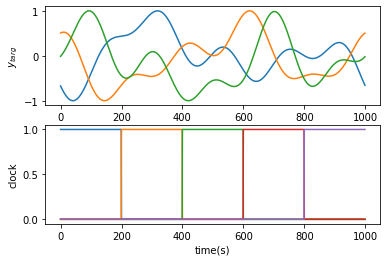

In [2]:
# define clock and target

lttb.init_targ(par)
lttb.init_clock(par)

plt.figure()
plt.subplot(211)
plt.plot(np.array(lttb.y_targ).T)
plt.ylabel('$y_{targ}$')
plt.subplot(212)
plt.plot(np.array(lttb.I_clock).T)
plt.xlabel('time(s)')
plt.ylabel('clock')
plt.show()


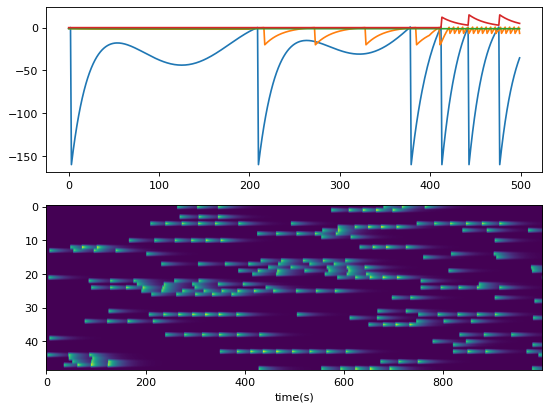

In [3]:
#initialize simulation

lttb.initialize(par)

#run simulation

for t in range(lttb.T-2):
    lttb.step(apicalFactor=1.)

#save target
S_apic_targ = lttb.S_apic_dist
B_targ = lttb.B_filt
    
ndx_plot = random.randint(0,lttb.N)

#plt.imshow(lttb.Vapic)
plt.figure(figsize=(8, 6), dpi=80)

plt.subplot(211)

plt.plot(lttb.Vapic[ndx_plot,0:500])
plt.plot(lttb.Vsoma[ndx_plot,0:500])
plt.plot(lttb.VapicRec[ndx_plot,0:500])

#plt.plot(lttb.S_soma[ndx_plot,:]*50)
#plt.plot(lttb.S_wind[ndx_plot,:]*100)
plt.plot(lttb.B_filt[ndx_plot,0:500]*250)

plt.subplot(212)
plt.imshow(1-lttb.S_wind[1:50,:],aspect = 'auto',cmap='gray')
plt.imshow(lttb.B_filt[1:50,:],aspect = 'auto')
#plt.imshow(lttb.S_soma[1:25,:],aspect = 'auto')
plt.xlabel('time(s)')

plt.show()

MATLAB code to be converted below

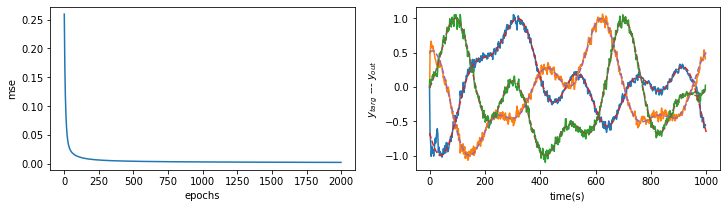

In [4]:
## Training RO

mse, Y = lttb.train_ro(par,out_epochs = 2000)

plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.plot(mse)
plt.xlabel('epochs')
plt.ylabel('mse')

plt.subplot(122)
plt.plot(Y.T)
plt.plot(lttb.y_targ.T,'--')
plt.xlabel('time(s)')
plt.ylabel('$y_{targ}$ --- $y_{out}$')
plt.show()


22.48144086149986
0.30546809013262594
0.26096878387879496
0.25384446828311696
0.25145015795003833
0.2406423646337228
0.2371630087007275
0.22588141384064392
0.22259901592947678
0.2239527032748899
0.2157037801227936
0.2031772344566927
0.21297537537272834
0.20470570249448536
0.2004835388085919
0.18573249620027624
0.17692629756995976
0.16672719205288328
0.15877701514664916
0.1507533377458994
0.13600837906269783
0.12176273833007809
0.1041374164648624
0.1043536462836525
0.09653822566502
0.0827121974269538
0.08446151844348262
0.0632042734917396
0.08864206992683633
0.06548392332797733
0.06079207260511279
0.06020801273541311
0.0706912265922177
0.05856709926880588
0.07114050317775962
0.054524274173926614
0.06866138758287807
0.057546709515918185
0.05927865458398534
0.04573066168491635
0.04904750502512126
0.0713889580232558
0.0827616285635803
0.0500280016793793
0.052400818373445186
0.07145375015121515
0.056887316125250054
0.045977792645308296
0.05283961191029548
0.05201815360961738


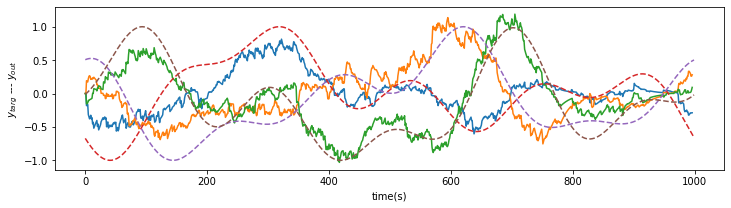

In [5]:
## Training Rec

gamma = 10.
def f(x,gamma):
    return np.exp(x*gamma)/(np.exp(x*gamma)+1)
#f1 = @(x)(gamma*exp(gamma*x))./(exp(gamma*x)+1)-(gamma*exp(2*gamma*x))./(exp(gamma*x)+1).^2;

apicalFactorTrain = 1
apicalFactorTest = 0

nIterRec = 50

eta_out = 0.01
eta = 10.
etaW = .0

for iter in range(nIterRec):
    
    ###### Online-Training

    #initialize simulation

    lttb.initialize(par)

    #run simulation
    dH = 0

    for t in range(lttb.T-2):
        
        lttb.step(apicalFactor = apicalFactorTrain)
        
        dH = dH*(1-dt/tau_m) + dt/tau_m*lttb.S_filt[:,t]
        #DJ = .2*np.outer(( lttb.B_filt[:,t+1] - lttb.B_filt_rec[:,t+1] ) ,dH)
        #DJ = np.outer(( S_apic_targ[:,t+1] - f(lttb.VapicRec[:,t],gamma) )*(1-S_apic_targ[:,t]) ,dH)
        DJ = np.outer(( lttb.S_apic_dist[:,t+1] - f(lttb.VapicRec[:,t],gamma) )*(1-lttb.S_apic_dist[:,t]) ,dH)
        lttb.J =  lttb.J + eta*DJ 
        
        #SR = [:,1:-2]
        SR = lttb.B_filt_rec[:,t+1]
        Y = lttb.Jout@SR
        DJRO = np.outer(lttb.y_targ[:,t+1] - Y,SR.T)
        lttb.Jout =  lttb.Jout + eta_out*DJRO
    #print(DJ)
        
    ###### Test
    
    lttb.initialize(par)

    #run simulation

    for t in range(lttb.T-2):
        
        lttb.step(apicalFactor = apicalFactorTest)
        
    SR = lttb.B_filt_rec[:,1:-2]
    Y = lttb.Jout@SR
    mse_rec_train = np.std(lttb.y_targ[:,1:-2] - Y)**2

    print(mse_rec_train)
    
#mse, Y = lttb.train_ro(par,out_epochs = 1)

plt.figure(figsize=(12, 3))
plt.plot(Y.T)
plt.plot(lttb.y_targ.T,'--')
plt.xlabel('time(s)')
plt.ylabel('$y_{targ}$ --- $y_{out}$')
plt.show()



0.04621439702969764


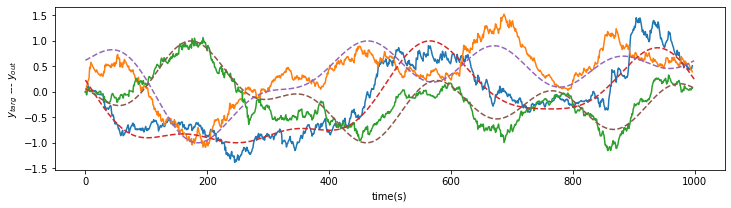

In [8]:
 ###### Test
    

#lttb.J = lttb.J *0
    
lttb.initialize(par)

    #run simulation

for t in range(lttb.T-2):
        
    lttb.step(apicalFactor = 0)
        
SR = (lttb.B_filt_rec[:,1:-2]+lttb.B_filt[:,1:-2])
Y = lttb.Jout@SR
mse_rec_train = np.std(lttb.y_targ[:,1:-2] - Y)**2

print(mse_rec_train)
    
#mse, Y = lttb.train_ro(par,out_epochs = 1)

plt.figure(figsize=(12, 3))
plt.plot(Y.T)
plt.plot(lttb.y_targ.T,'--')
plt.xlabel('time(s)')
plt.ylabel('$y_{targ}$ --- $y_{out}$')
plt.show()

